In [12]:
import glob
from utilities import *
import pixel_distance as pd
import matplotlib.pyplot as plt

path = '../data/hw01_preds/preds.json'
base_kernel_path = '../data/kernels'
image_base_path = '../data/RedLights2011_Medium'
save_path = '../data/convolved_images/'
save_path2 = '../data/pooled_images/'

kernel_id = 'average'
image_paths = sorted(glob.glob(image_base_path + '/*'))
image_path = image_paths[0]
image = load_image(image_path)
img_arr = image_to_array(image)

lp1 = save_path + 'kernel=' + str(kernel_id) + '_filter1d.npy'
lp2 = save_path + 'kernel=' + str(kernel_id) + '_filter2d.npy'
lp3 = save_path + 'kernel=' + str(kernel_id) + '_filter3d.npy'

ci1 = np.load(lp1, allow_pickle=True)
ci2 = np.load(lp2, allow_pickle=True)
ci3 = np.load(lp3, allow_pickle=True)

pooled_arr = np.load(save_path2 + 'pooled_scores.npy')
mapped_arr = np.load(save_path2 + 'mapped_scores.npy')
sub_pooled_arr = np.load(save_path2 + 'sub_pooled_scores.npy')



In [13]:
pooled = np.mean(pooled_arr, axis=2)

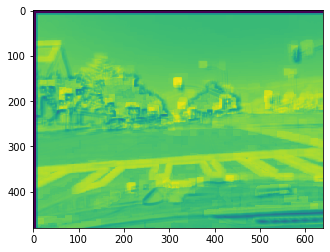

In [30]:
pooled_ci1 = pooled * np.sum(ci1, axis=2)
threshs = np.linspace(0, 1, 21)
for thr in threshs:
    pci = np.copy(pooled_ci1)
    pci[pci < thr] = 0
    plt.imshow(pci)